## Importing Libraries

In [2034]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option("display.max_columns",50)
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import datetime
from sklearn.metrics import mean_squared_error

# Project:
## Taco Sales Predictive Analysis With EDA (2024-2025)

In [2035]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\taco_sales_(2024-2025).csv")

## Data Info

In [2036]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order ID                 1000 non-null   int64  
 1   Restaurant Name          1000 non-null   object 
 2   Location                 1000 non-null   object 
 3   Order Time               1000 non-null   object 
 4   Delivery Time            1000 non-null   object 
 5   Delivery Duration (min)  1000 non-null   int64  
 6   Taco Size                1000 non-null   object 
 7   Taco Type                1000 non-null   object 
 8   Toppings Count           1000 non-null   int64  
 9   Distance (km)            1000 non-null   float64
 10  Price ($)                1000 non-null   float64
 11  Tip ($)                  1000 non-null   float64
 12  Weekend Order            1000 non-null   bool   
dtypes: bool(1), float64(3), int64(3), object(6)
memory usage: 94.9+ KB


In [2037]:
df.head()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order
0,770487,El Taco Loco,New York,01-08-2024 14:55,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,671858,El Taco Loco,San Antonio,23-11-2024 17:11,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,688508,Taco Haven,Austin,21-11-2024 20:24,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,944962,Spicy Taco House,Dallas,21-09-2024 06:43,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,476417,Casa del Taco,San Antonio,24-07-2024 11:01,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False


In [2038]:
df.columns

Index(['Order ID', 'Restaurant Name', 'Location', 'Order Time',
       'Delivery Time', 'Delivery Duration (min)', 'Taco Size', 'Taco Type',
       'Toppings Count', 'Distance (km)', 'Price ($)', 'Tip ($)',
       'Weekend Order'],
      dtype='object')

In [2039]:
df.shape

(1000, 13)

## Data Handling & Cleaning

In [2040]:
df.isna().sum()
df.dropna(subset=["Delivery Time"],inplace=True)

In [2041]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [2042]:
df["Delivery Time"].describe()

count                 1000
unique                 999
top       15-04-2025 16:06
freq                     2
Name: Delivery Time, dtype: object

In [2043]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order ID                 1000 non-null   int64  
 1   Restaurant Name          1000 non-null   object 
 2   Location                 1000 non-null   object 
 3   Order Time               1000 non-null   object 
 4   Delivery Time            1000 non-null   object 
 5   Delivery Duration (min)  1000 non-null   int64  
 6   Taco Size                1000 non-null   object 
 7   Taco Type                1000 non-null   object 
 8   Toppings Count           1000 non-null   int64  
 9   Distance (km)            1000 non-null   float64
 10  Price ($)                1000 non-null   float64
 11  Tip ($)                  1000 non-null   float64
 12  Weekend Order            1000 non-null   bool   
dtypes: bool(1), float64(3), int64(3), object(6)
memory usage: 94.9+ KB


In [2044]:
df.head()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order
0,770487,El Taco Loco,New York,01-08-2024 14:55,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,671858,El Taco Loco,San Antonio,23-11-2024 17:11,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,688508,Taco Haven,Austin,21-11-2024 20:24,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,944962,Spicy Taco House,Dallas,21-09-2024 06:43,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,476417,Casa del Taco,San Antonio,24-07-2024 11:01,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False


In [2045]:
df.columns

Index(['Order ID', 'Restaurant Name', 'Location', 'Order Time',
       'Delivery Time', 'Delivery Duration (min)', 'Taco Size', 'Taco Type',
       'Toppings Count', 'Distance (km)', 'Price ($)', 'Tip ($)',
       'Weekend Order'],
      dtype='object')

In [2046]:
df.head()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order
0,770487,El Taco Loco,New York,01-08-2024 14:55,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,671858,El Taco Loco,San Antonio,23-11-2024 17:11,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,688508,Taco Haven,Austin,21-11-2024 20:24,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,944962,Spicy Taco House,Dallas,21-09-2024 06:43,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,476417,Casa del Taco,San Antonio,24-07-2024 11:01,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False


In [2047]:
# Ensure Delivery Time is a string (if not already)
df["Delivery Time"] = df["Delivery Time"].astype(str)

# Split Delivery Time into date and time
df[["Delivery Date", "Delivery Clock Time"]] = df["Delivery Time"].str.split(" ", expand=True)

In [2048]:
df.drop(columns=["Delivery Time","Order ID"],inplace=True) # Removing column for better readability

In [2049]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant Name          1000 non-null   object 
 1   Location                 1000 non-null   object 
 2   Order Time               1000 non-null   object 
 3   Delivery Duration (min)  1000 non-null   int64  
 4   Taco Size                1000 non-null   object 
 5   Taco Type                1000 non-null   object 
 6   Toppings Count           1000 non-null   int64  
 7   Distance (km)            1000 non-null   float64
 8   Price ($)                1000 non-null   float64
 9   Tip ($)                  1000 non-null   float64
 10  Weekend Order            1000 non-null   bool   
 11  Delivery Date            1000 non-null   object 
 12  Delivery Clock Time      1000 non-null   object 
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 94.9+ KB


In [2050]:
df.shape

(1000, 13)

## EDA & Visualization

### Which Restaurant has the highest weekend order rate

In [2051]:
classifi_or = df.groupby(["Restaurant Name", "Weekend Order"]).size().reset_index(name="Count")
classifi_or

,Restaurant Name,Weekend Order,Count
0,Casa del Taco,False,76
1,Casa del Taco,True,28
2,El Taco Loco,False,59
3,El Taco Loco,True,26
4,Grande Tacos,False,67
5,Grande Tacos,True,39
6,La Vida Taco,False,68
7,La Vida Taco,True,30
8,Spicy Taco House,False,82
9,Spicy Taco House,True,18


In [2052]:
fig = px.bar(classifi_or, x="Restaurant Name", y="Count", color="Weekend Order")
fig.show()

### Difference between order time and delivery time & duration

In [2053]:
classifi_t=df[["Order Time","Delivery Clock Time","Delivery Duration (min)"]]
classifi_t
fig = px.scatter(df, x="Order Time", y="Delivery Clock Time", color="Delivery Duration (min)",
                 title="Order Time vs Delivery Clock Time")
fig.show()


### Average Delivery Duration Count By Restaurant

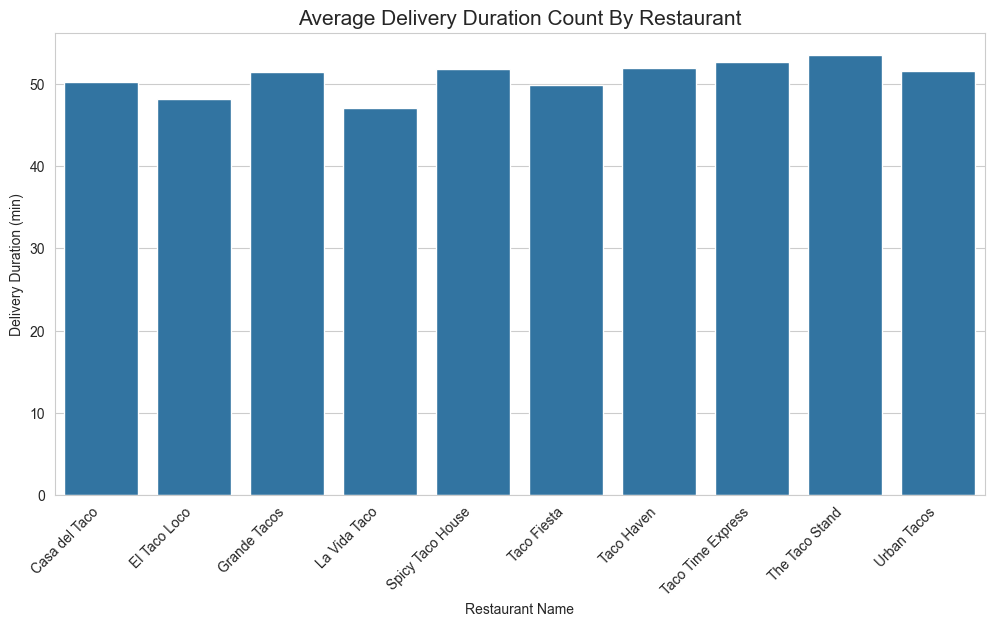

In [2054]:
classifi_re=df.groupby("Restaurant Name")["Delivery Duration (min)"].mean().reset_index()
classifi_re
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.barplot(data=classifi_re,x="Restaurant Name",y="Delivery Duration (min)")
plt.title("Average Delivery Duration Count By Restaurant",fontsize=15)
plt.xticks(rotation=45,ha="right")
plt.show()

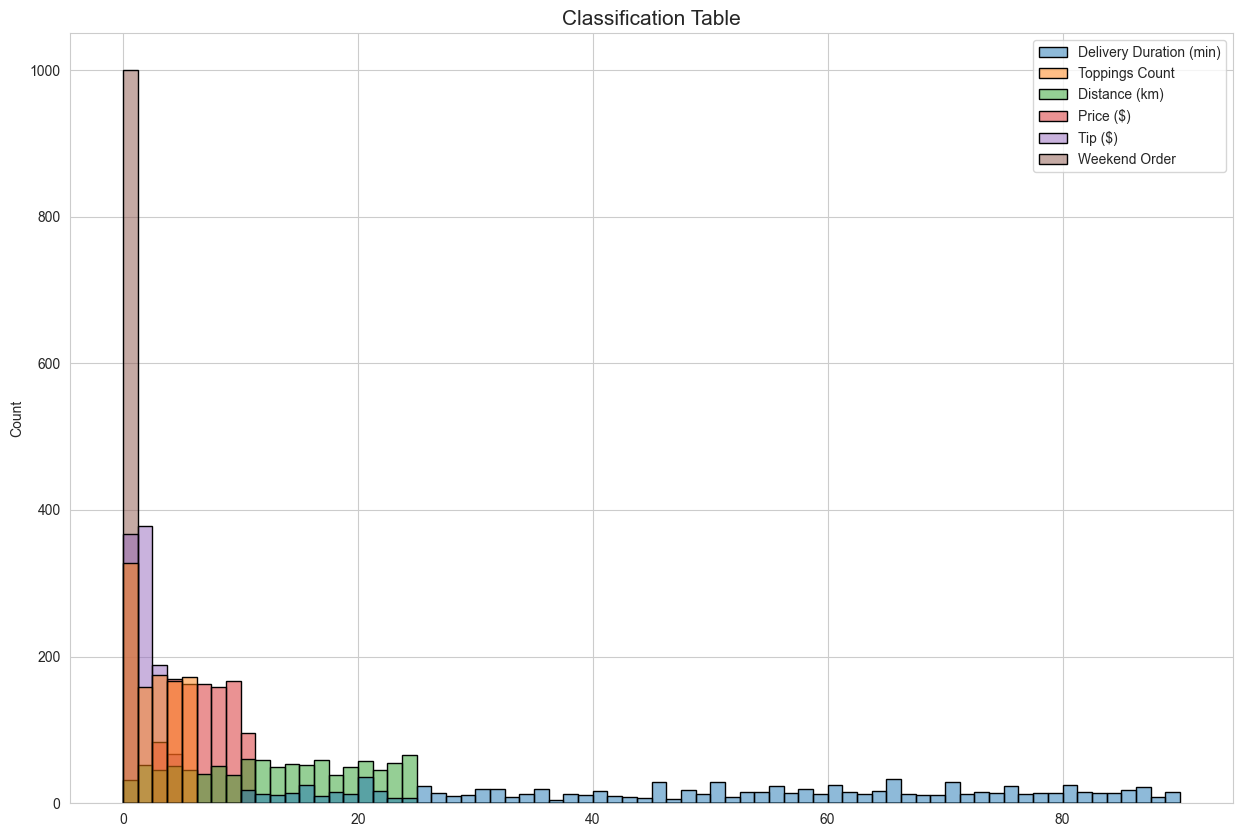

In [2055]:
plt.figure(figsize=(15,10))
sns.histplot(data=df,edgecolor="black")
plt.title("Classification Table",fontsize=15)
plt.show()

## Machine Learning

In [2057]:
df["Delivery Date"]=pd.to_datetime(df["Delivery Date"],errors="coerce")


In [2058]:
df["Delivery Year"]=df["Delivery Date"].dt.year
df["Delivery Month"]=df["Delivery Date"].dt.month
df["Delivery Day"]=df["Delivery Date"].dt.day

In [2059]:
df[["Delivery Year","Delivery Month","Delivery Day"]]=df[["Delivery Year","Delivery Month","Delivery Day"]].apply(lambda x: x.fillna(x.mean()))

In [2060]:
df[["Delivery Year","Delivery Month","Delivery Day"]]=df[["Delivery Year","Delivery Month","Delivery Day"]].astype(int)

In [2062]:
df["Order Time"]=pd.to_datetime(df["Order Time"],errors="coerce")
df["Order Year"]=df["Order Time"].dt.year
df["Order Month"]=df["Order Time"].dt.month
df["Order Day"]=df["Order Time"].dt.day

In [2063]:
df[["Order Year","Order Month","Order Day"]]=df[["Order Year","Order Month","Order Day"]].apply(lambda x: x.fillna(x.mean()))

In [2064]:
df[["Order Year","Order Month","Order Day"]]=df[["Order Year","Order Month","Order Day"]].astype(int)

In [2066]:
df.drop(columns=["Delivery Date","Order Time"],inplace=True)

In [2067]:
df["Taco Type"].value_counts()

Taco Type
Chicken Taco    218
Fish Taco       211
Veggie Taco     197
Pork Taco       192
Beef Taco       182
Name: count, dtype: int64

### To find out which category corresponds to which number using maping

In [2068]:
le=LabelEncoder()
df["Taco Size"] = le.fit_transform(df["Taco Size"])
label_mapping_size = dict(zip(le.classes_, le.transform(le.classes_)))
print("Taco Size Mapping:", label_mapping_size)

Taco Size Mapping: {'Large': np.int64(0), 'Regular': np.int64(1)}


In [2069]:
df["Taco Type"] = le.fit_transform(df["Taco Type"])
label_mapping_type = dict(zip(le.classes_, le.transform(le.classes_)))
print("Taco Type Mapping:", label_mapping_type)

Taco Type Mapping: {'Beef Taco': np.int64(0), 'Chicken Taco': np.int64(1), 'Fish Taco': np.int64(2), 'Pork Taco': np.int64(3), 'Veggie Taco': np.int64(4)}


In [2070]:
le=LabelEncoder()
df["Location"] = le.fit_transform(df["Location"])
label_mapping_size = dict(zip(le.classes_, le.transform(le.classes_)))
print("Location Mapping:", label_mapping_size)

Location Mapping: {'Austin': np.int64(0), 'Chicago': np.int64(1), 'Dallas': np.int64(2), 'Houston': np.int64(3), 'Los Angeles': np.int64(4), 'New York': np.int64(5), 'Phoenix': np.int64(6), 'San Antonio': np.int64(7), 'San Diego': np.int64(8), 'San Jose': np.int64(9)}


In [2071]:
le=LabelEncoder()
df["Restaurant Name"] = le.fit_transform(df["Restaurant Name"])
label_mapping_size = dict(zip(le.classes_, le.transform(le.classes_)))
print("Restaurant Mapping:", label_mapping_size)

Restaurant Mapping: {'Casa del Taco': np.int64(0), 'El Taco Loco': np.int64(1), 'Grande Tacos': np.int64(2), 'La Vida Taco': np.int64(3), 'Spicy Taco House': np.int64(4), 'Taco Fiesta': np.int64(5), 'Taco Haven': np.int64(6), 'Taco Time Express': np.int64(7), 'The Taco Stand': np.int64(8), 'Urban Tacos': np.int64(9)}


In [2072]:
df["Weekend Order"]=df["Weekend Order"].astype(int)  ## Converting boiol dtype column into numeric 

In [2073]:
df.head()

,Restaurant Name,Location,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order,Delivery Clock Time,Delivery Year,Delivery Month,Delivery Day,Order Year,Order Month,Order Day
0,1,5,41,1,1,5,3.01,9.25,2.22,0,15:36,2024,1,8,2024,1,8
1,1,7,14,1,0,1,6.20,4.25,3.01,1,17:25,2024,6,5,2024,6,5
2,6,0,38,0,3,2,20.33,7.00,0.02,0,21:02,2024,6,5,2024,6,5
3,4,2,45,1,1,2,3.00,5.50,1.90,1,07:28,2024,6,5,2024,6,5
4,0,7,15,0,3,0,24.34,4.50,1.14,0,11:16,2024,6,5,2024,6,5


In [2074]:
df["Delivery Clock Time"] = pd.to_datetime(df["Delivery Clock Time"], format="%H:%M", errors="coerce")
df["Delivery Time"]=df["Delivery Clock Time"].dt.time


In [2075]:
df.drop(columns=["Delivery Clock Time","Delivery Time"],inplace=True) # Removing Columns

In [2076]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant Name          1000 non-null   int64  
 1   Location                 1000 non-null   int64  
 2   Delivery Duration (min)  1000 non-null   int64  
 3   Taco Size                1000 non-null   int64  
 4   Taco Type                1000 non-null   int64  
 5   Toppings Count           1000 non-null   int64  
 6   Distance (km)            1000 non-null   float64
 7   Price ($)                1000 non-null   float64
 8   Tip ($)                  1000 non-null   float64
 9   Weekend Order            1000 non-null   int64  
 10  Delivery Year            1000 non-null   int64  
 11  Delivery Month           1000 non-null   int64  
 12  Delivery Day             1000 non-null   int64  
 13  Order Year               1000 non-null   int64  
 14  Order Month              

In [2078]:
df["Restaurant Name"].value_counts()

Restaurant Name
9    117
2    106
8    105
0    104
4    100
5     99
3     98
6     95
7     91
1     85
Name: count, dtype: int64

In [2079]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant Name          1000 non-null   int64  
 1   Location                 1000 non-null   int64  
 2   Delivery Duration (min)  1000 non-null   int64  
 3   Taco Size                1000 non-null   int64  
 4   Taco Type                1000 non-null   int64  
 5   Toppings Count           1000 non-null   int64  
 6   Distance (km)            1000 non-null   float64
 7   Price ($)                1000 non-null   float64
 8   Tip ($)                  1000 non-null   float64
 9   Weekend Order            1000 non-null   int64  
 10  Delivery Year            1000 non-null   int64  
 11  Delivery Month           1000 non-null   int64  
 12  Delivery Day             1000 non-null   int64  
 13  Order Year               1000 non-null   int64  
 14  Order Month              

In [2080]:
print(df.dtypes[df.dtypes == "object"])  # shows object-type columns
print(df.dtypes[df.dtypes == "datetime64[ns]"])  # shows datetime columns


Series([], dtype: object)
Series([], dtype: object)


In [2081]:
df.fillna(df.mean(), inplace=True)  # Fill NaNs with mean values


In [2082]:
x = df.drop("Price ($)", axis=1)
y = df["Price ($)"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 1.303001000198806e-29


## Correlation Heatmap

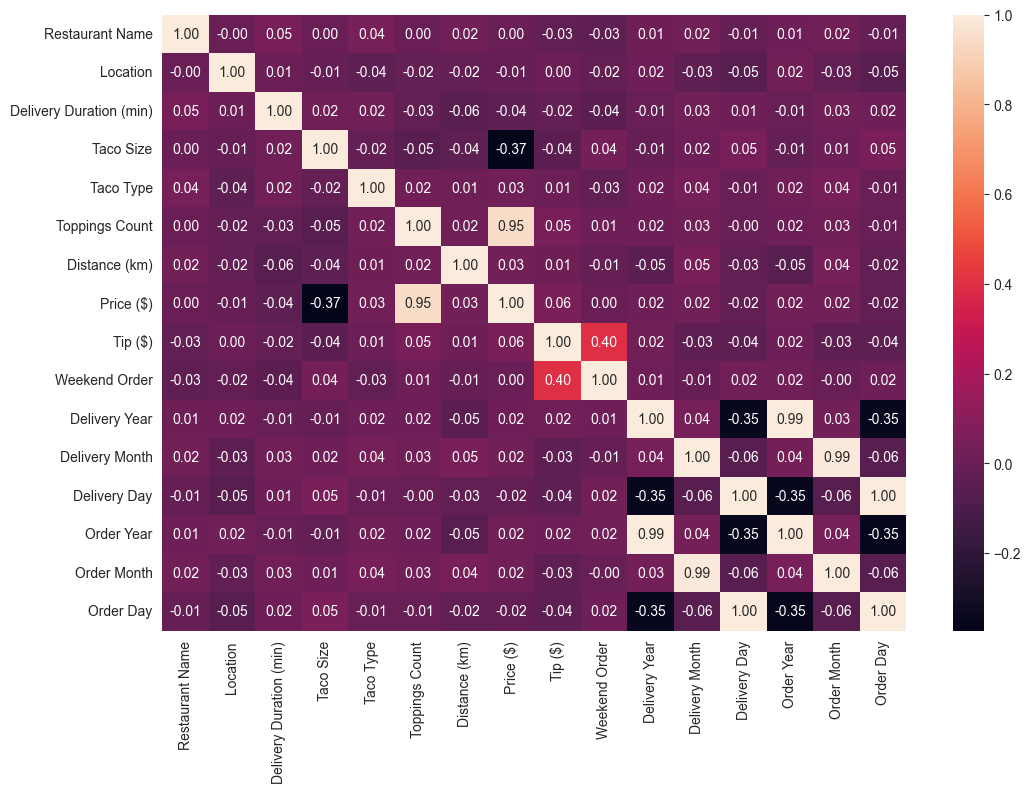

In [2083]:
cor=df.select_dtypes(include="number").corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=cor,annot=True,fmt=".2f")
plt.show()

## Predicting Price With New Data

In [2084]:
import pandas as pd

new_data = pd.DataFrame([{
    'Restaurant Name': 42,
    'Location': 3,
    'Delivery Duration (min)': 12,
    'Taco Size': 1,
    'Taco Type': 2,
    'Toppings Count': 3,
    'Distance (km)': 4.5,
    'Tip ($)': 1.25,
    'Weekend Order': 0,
    'Delivery Year': 2024,
    'Delivery Month': 6,
    'Delivery Day': 12,
    'Order Year': 2024,
    'Order Month': 6,
    'Order Day': 12
}])


In [2085]:
predicted_price = model.predict(new_data)
print(f"Predicted Price of Taco: ${predicted_price[0]:.2f}")

Predicted Price of Taco: $6.75
